##Análisis Univariado

###Realizar un pequeño análisis univariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.

####Link al Dataset

Los datos los obtuvimos del siguiente [link](https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv)

####¿Qué es el Análisis Univariado?

El análisis univariado, consiste en el análisis de cada una de las variables estudiadas por separado es decir, el análisis se basa exclusivamente en una única variable. 
La idea es poder obtener cierta información descriptiva de la variable, para lo cual nos apoyaremos en el uso de estadísticas y gráficos.

###Definición del problema

**Contexto**

Con el rápido desarrollo de la insdutria de la telecomunicación e incremento de la copetencia, se ha vuelto un desafío ampliar la base de usuarios y retener los existentes. Como es sabido, es más costosa la adquisición de nuevos usuarios que la retención de existentes. Es en este contexto que se vuelve fundamental aplicar analítica avanzada para predecir la posibilidad de que un cliente pueda abandonar la empresa e identificarlo antes de que su decisión este tomada y poder revertir la situación.

Librerías que utilizaremos

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import ipywidgets as widgets
import missingno as msno
!pip install sidetable
import sidetable
from pandas.api.types import is_numeric_dtype
from pandas.core.frame import DataFrame
from prettytable import PrettyTable
from matplotlib.patches import Rectangle
from scipy.stats import norm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Carga del DataSet

In [2]:
#Determinamos cuántas columnas y rows queremos que nos muestre por defecto:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


Eliminación la columna "Unnamed" (son los índices que quedaron al guardarse)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


Verificación de forma del conjunto de datos

In [5]:
print(f'La cantidad de columnas del dataset de Churn son {df.shape[1]} y {df.shape[0]} filas')

La cantidad de columnas del dataset de Churn son 51 y 10000 filas


Paso 1: Descubrimiento

Comprender los datos, la estructura, tipos y cantidad.

### Descripcion de Variables

Una de las primeras cosas que uno debe verificar es qué tipo de datos tengo. 

Inicialmente es poder revisar qué tipos de columnas tiene el dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [7]:
#Ver resumen del datatypes que arroja el .info():
df.dtypes.value_counts()

object     28
int64      14
float64     9
dtype: int64

Definición de las columnas del Dataset:

Son datos demográficos, de comportamiento, opinión, consumo y facturación de los clientes. 

A continuación, se describe cada columna del Dataset: 

***Object (28)*** 

1. Customer_id: Unique customer ID
2. Interaction: Unique IDs related to customer transactions, technical support, and sign ups
3. City: Customer city of residence as listed on the billing statement
4. State: Customer state of residence as listed on the billing statement
5. County: Customer county of residence as listed on the billing statement
6. Area: Area type (rural, urban, suburban), b ased on census data
7. Timezone: Time zone of customer residence based on customer’s sign upinformation
8. Job: Job of the customer (or invoiced person) as reported in sign up information
9. Education: Highest degree earned by customer as reported in sign up information
10. Employment: Employment status of customer as reported in sign up information
11. Marital: Marital status of customer as reported in sign up information
12. Gender: Customer self identification as male, female, or nonbinary
13. Churn: : Whether the customer discontinued service within the last month (yes/no)
14. Techie: Whether the customer considers themselves technically inclined (based on customer questionnaire when they signed up for services) (yes/no)
15. Contract: Number of times customer contacted technical support
16. Port_modem: Whether the customer has a portable modem (yes/no)
17. Tablet: Whether the customer owns a tablet such as iPad, Surface, etc. (yes/no)
18. InternetService: Customer’s internet service provider (DSL, fiber optic, None)
19. Phone: Whether the customer has a phone service (yes/no)
20. Multiple: Whether the customer has multiple lines (yes/no)
21. OnlineSecurity: Whether the customer has an online security add on (yes/no)
22. OnlineBackup: Whether the customer has an online backup add on (yes/no)
23. DeviceProtection: Whether the customer has device protection add on (yes/no)
24. TechSupport: Whether the customer has a technical support add on (yes/no)
25. StreamingTV: Whether the customer has streaming TV (yes/no)
26. StreamingMovies: Whether the customer has streaming movies (yes/no)
27. PaperlessBilling: Whether the customer has paperless billing (yes/no)
28. PaymentMethod: The customer’s payment method (electronic check, mailed check,bank (automatic bank transfer), credit card (automatic))

***Int64 (14)***

 1. CaseOrder: A placeholder variable to preserve the original order of the raw data file
 2. Zip: Customer zip c ode of residence as listed on the billing statement
 3. Population: Population within a mile radius of customer, based on census data
 4. Email: Number of emails sent to the customer in the last year (marketing or correspondence)
 5. Contacts: Number of times customer contacted technical support
 6. Yearly_equip_failure: The number of times customer’s equipment failed and had to be reset/replaced in the past year

The following variables represent responses to an eight question survey asking customers to rate the importance of various factors/sur faces on a scale of 1 to 8 (1 = most important,8 = least important):

7. Item1: Timely response
8. Item2: Timely fixes
9. Item3: Timely replacements
10. Item4: Reliability
11. Item5: Options
12. Item6: Respectful response
13. Item7: Courteous exchange
14. Item8: Evidence of active listening

***Float64 (9)***

1. Lat: Lat GPS coordinates of customer residence as listed on the billing statement
2. Lng: Lng GPS coordinates of customer residence as listed on the billing statement
3. Children: Number of children in customer’s household as reported in sign up information
4. Age: Age of customer as reported in sign up information
5. Income: Annual income of cu stomer as reported at time of sign up
6. Outage_sec_perweek: Average number of seconds per week of system outages in the customer’s neighborhood
7. Tenure: Number of months the customer has stayed with the provider
8. MonthlyCharge: The amount charged to the customer monthly. This value reflects an average per customer
9. Bandwidth_GB_Year: The average amount of data used, in GB, in a year by the customer

Guardado de datos originales en una tabla de backup

In [8]:
original = df

Identificación de variables Numéricas y Categóricas

In [9]:
num_columns = df.select_dtypes(include = ["number"]).columns
cat_columns = df.select_dtypes(include = ["object"]).columns

In [10]:
#Variables Numéricas:
num_columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [11]:
#Variables Categóricas:
cat_columns


Index(['Customer_id', 'Interaction', 'City', 'State', 'County', 'Area',
       'Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender',
       'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### Datos Básicos

Cálculo de información estadística y genérica de cada columna de un dataframe: En lugar dw utilizar el ".describe", con esta función obtendremos mayor grado de detalle

In [12]:
def univariado_info(df):
  '''Cálculo de información estadística y genérica de cada columna de un dataframe'''

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])

  for col in df:

      data_series = df[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

df_uni_stats = univariado_info(df)
df_uni_stats

,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
CaseOrder,10000,int64,0,10000,True,-,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0,0.0,-1.2
Customer_id,10000,object,0,10000,False,K409198,-,-,-,-,-,-,-,-,-
Interaction,10000,object,0,10000,False,aa90260b-4141-4a24-8e36-b04ce1f4f77b,-,-,-,-,-,-,-,-,-
City,10000,object,0,6058,False,Houston,-,-,-,-,-,-,-,-,-
State,10000,object,0,52,False,TX,-,-,-,-,-,-,-,-,-
County,10000,object,0,1620,False,Washington,-,-,-,-,-,-,-,-,-
Zip,10000,int64,0,8583,True,-,49153.3196,27532.196108,601.0,26292.5,48869.5,71866.5,99929.0,0.071069,-1.063105
Lat,10000,float64,0,8563,True,-,38.757567,5.437389,17.96612,35.341828,39.3958,42.106908,70.64066,0.077977,2.991702
Lng,10000,float64,0,8655,True,-,-90.782536,15.156142,-171.68815,-97.082812,-87.9188,-80.088745,-65.66785,-1.336513,2.605296
Population,10000,int64,0,5933,True,-,9756.5624,14432.698671,0.0,738.0,2910.5,13168.0,111850.0,2.205008,5.516785


Convertir todos los nombres de las columnas a lower case:

Hicimos esto para evitar problemas al escribir los nombres de las columnas, ya que python es case sensitive

In [13]:
def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [14]:
col_names = to_lowercase(df.columns.values)

df.set_axis(col_names,axis='columns',inplace=True)

df.columns.values

array(['caseorder', 'customer_id', 'interaction', 'city', 'state',
       'county', 'zip', 'lat', 'lng', 'population', 'area', 'timezone',
       'job', 'children', 'age', 'education', 'employment', 'income',
       'marital', 'gender', 'churn', 'outage_sec_perweek', 'email',
       'contacts', 'yearly_equip_failure', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'paymentmethod', 'tenure', 'monthlycharge',
       'bandwidth_gb_year', 'item1', 'item2', 'item3', 'item4', 'item5',
       'item6', 'item7', 'item8'], dtype=object)

In [57]:
#Cambiamos los nombres de las últimas columnas reemplazar itemx por el nombre del item:

factores_items = {'item1': 'timely_response', 
                  'item2': 'timely_fixes', 
                  'item3': 'timely_replacements', 
                  'item4': 'reliability', 
                  'item5': 'options',
                  'item6': 'respectful_response',
                  'item7': 'courteous_exchange',
                  'item8': 'active_listening'}

df.rename(columns=factores_items, inplace=True)

df.head(2)

,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,children_cat,age_cat,caseorder_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,nan,68.0,1,99927,38,99927,0,1
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,1.0,27.0,2,48661,10446,48661,0,1


In [58]:
# Con PrettyTable, genero una función que realiza una tabla resumen de los campos del dataset:

def df_explore(df):

    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df)

Shape:  (10000, 59)
+----------------------+---------+----------+-------+--------+--------------------------------------+
|        Column        |   Type  | Non-Null | Nulls | Unique |               Example                |
+----------------------+---------+----------+-------+--------+--------------------------------------+
|      caseorder       |  int64  |  10000   |   0   | 10000  |                  1                   |
|     customer_id      |  object |  10000   |   0   | 10000  |               K409198                |
|     interaction      |  object |  10000   |   0   | 10000  | aa90260b-4141-4a24-8e36-b04ce1f4f77b |
|         city         |  object |  10000   |   0   |  6058  |             Point Baker              |
|        state         |  object |  10000   |   0   |   52   |                  AK                  |
|        county        |  object |  10000   |   0   |  1620  |        Prince of Wales-Hyder         |
|         zip          |  int64  |  10000   |   0   |  8583  |

Confirmar si hay datos Duplicados y/o Nulos.

###Duplicados:

In [59]:
#Determinar si hay duplicados en la tabla
print(f'El data set tiene {df.duplicated().sum()} rows duplicadas')

#Dterminar si hay duplicados en los ID de clientes
print(f'La columna customer_id tiene {df.customer_id.duplicated().sum()} datos duplicados')

El data set tiene 0 rows duplicadas
La columna customer_id tiene 0 datos duplicados


###Nulos:

In [60]:
#Determnar si hay datos nulos en cada columna y cuántos:
df.isnull().sum()

caseorder                  0
customer_id                0
interaction                0
city                       0
state                      0
county                     0
zip                        0
lat                        0
lng                        0
population                 0
area                       0
timezone                   0
job                        0
children                2495
age                     2475
education                  0
employment                 0
income                  2490
marital                    0
gender                     0
churn                      0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  2477
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                   1026
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotecti

In [61]:
#No queremos ver las columnas que tienen 0 nulos, solamente aquellas que si tienen datos nulos:
valoresnull = df.isnull().sum()
valoresnull[valoresnull > 0]
valoresnull[valoresnull > 0].sort_values(ascending=False)

children             2495
income               2490
techie               2477
age                  2475
phone                1026
bandwidth_gb_year    1021
techsupport           991
tenure                931
dtype: int64

In [62]:
#Determinar la cantidad de Nulos de cada columna en porcentaje:
q_nulos = df.isnull().sum()[df.isnull().sum()>0]
porc_nulos = df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100

tabla_nulos = DataFrame([q_nulos,porc_nulos],index=['q_nulos','%_nulos']).T
tabla_nulos.sort_values('%_nulos',ascending=False)

,q_nulos,%_nulos
children,2495.0,24.95
income,2490.0,24.90
techie,2477.0,24.77
age,2475.0,24.75
phone,1026.0,10.26
bandwidth_gb_year,1021.0,10.21
techsupport,991.0,9.91
tenure,931.0,9.31


In [63]:
# Los valores null de la variable children corresponden a personas sin hijos? --> hipótesis: si no existe el valor 0 los nulls representan el 0
print(f'Los valores nulos de la variable children parecen ser datos faltantes, ya que los valores que no son nulos van de 0 (no tienen niños) a 10')
print(f'El menor valor de la variable children es {min(pd.Series(df.children.unique()).sort_values().values)}')

Los valores nulos de la variable children parecen ser datos faltantes, ya que los valores que no son nulos van de 0 (no tienen niños) a 10
El menor valor de la variable children es 0.0


In [64]:
# Los valores null de la variable tenure corresponden a clientes nuevos? --> hipótesis: si no existe el valor 0 los nulls representan el 0, siendo estos clientes que aún no han cumplido un mes de antiguedad

print(f'Los valores nulos de la variable tenure parecen ser clientes de menos de un mes de antiguedad, ya que el valor mínimo de la variable es 1')
print(f'El menor valor de la variable tenure es {min(df.tenure.unique())}')

Los valores nulos de la variable tenure parecen ser clientes de menos de un mes de antiguedad, ya que el valor mínimo de la variable es 1
El menor valor de la variable tenure es 1.00025934


In [65]:
# Hipótesis: Quienes tienen null en bandwidth_gb_year, no contratan servicio de internet.

if df[['internetservice','bandwidth_gb_year']][df.bandwidth_gb_year.isnull()][df.internetservice!='None'].shape[0] > 0:
  print('La variable bandwidth_gb_year tiene valores nulos para algunos servicios de internet')

La variable bandwidth_gb_year tiene valores nulos para algunos servicios de internet


Graficamos los datos nulos por columnas con Matrix

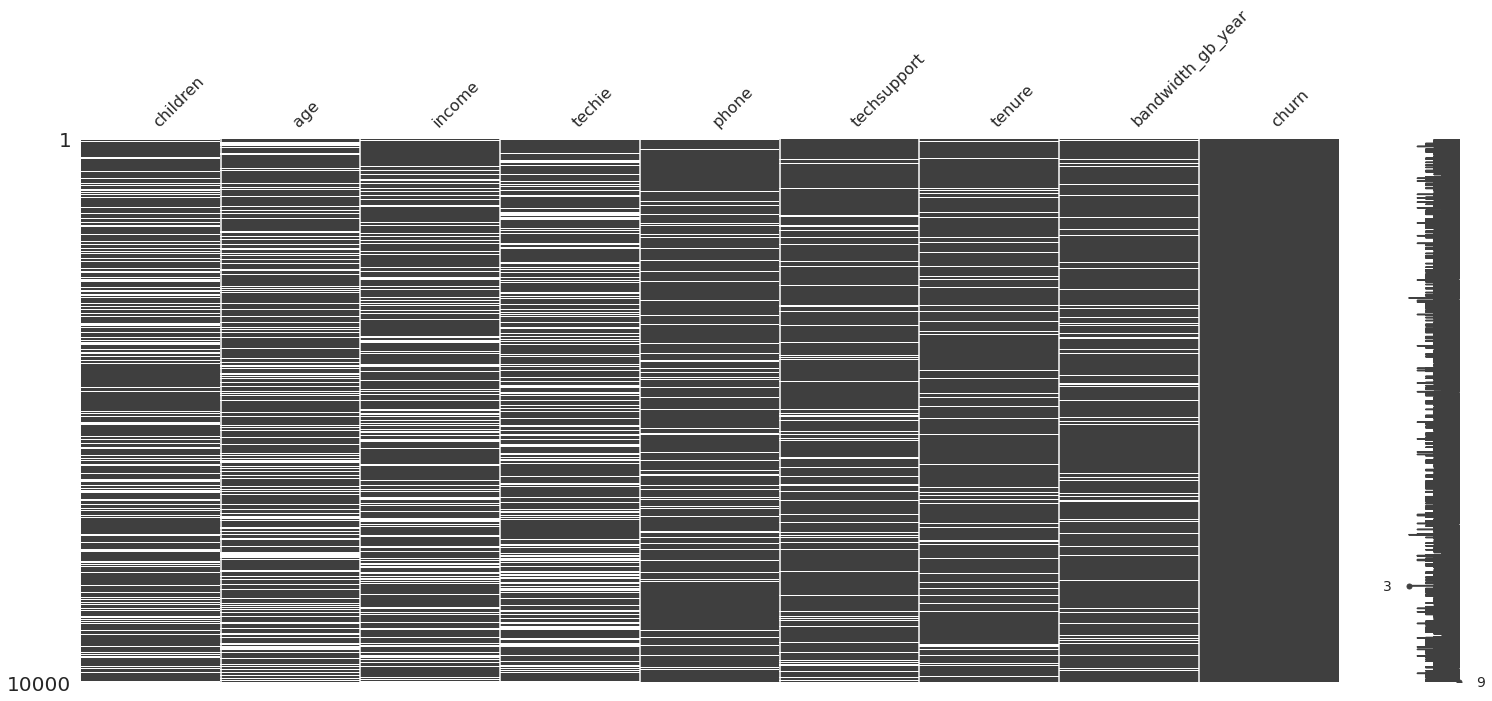

In [66]:
#Los valores nulos de las variables con ~25% de valores nulos corresponden a los mismos clientes?:
cols_nulos=list(tabla_nulos.index.values)
cols_nulos.append('churn')

msno.matrix(df[cols_nulos]);

In [67]:
#Hay algún cliente que tenga todas estas categorias nulas?

df[df.children.isnull() & df.income.isnull() & df.techie.isnull() & df.phone.isnull() & df.techsupport.isnull() & df.tenure.isnull() & df.bandwidth_gb_year.isnull()].index

Int64Index([], dtype='int64')

In [68]:
dict_nulls = {}
for col in cols_nulos[0:(len(cols_nulos)-1)]:
  dict_nulls[col] =df[cols_nulos][col].isnull()

df_nulos_count = pd.DataFrame(dict_nulls)
df_nulos_count['q_nulos']=df_nulos_count.sum(axis=1)
df_nulos_count[df_nulos_count.q_nulos>3].index

Int64Index([  88,  112,  142,  192,  210,  215,  242,  359,  373,  435,
            ...
            9831, 9834, 9858, 9870, 9893, 9913, 9947, 9957, 9975, 9997],
           dtype='int64', length=333)

Hay 333 clientes que tienen 4 o más columnas nulas

In [69]:
freq_nulos=df_nulos_count.groupby(by='q_nulos').count()
freq_nulos.unstack()['children']

q_nulos
0    2133
1    3646
2    2784
3    1104
4     288
5      42
6       3
dtype: int64

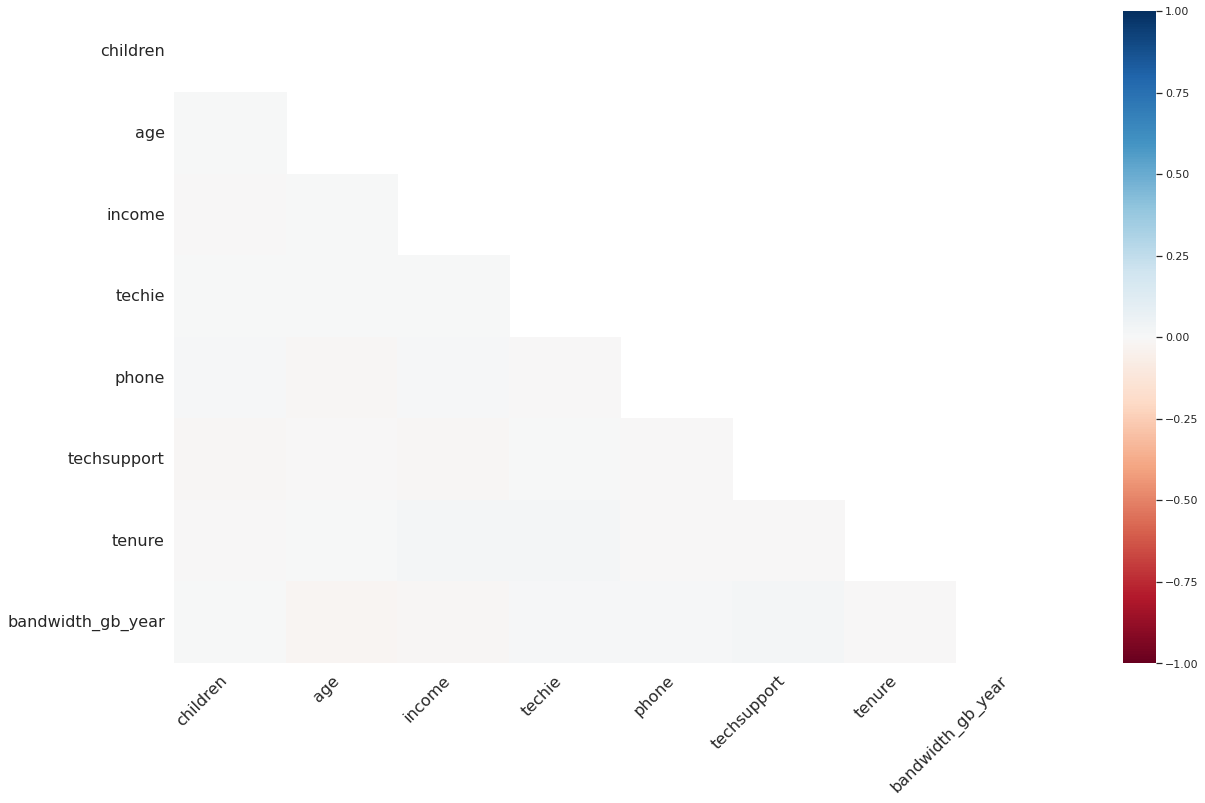

In [70]:
msno.heatmap(df);

#### **Observaciones** 

Hay 8 columnas con datos nulos. 

Children, income, techie y age tienen aprox 25% de los datos nulos. Las excluimos del análisis? Deberíamos determinar esto más adelante en el análisis bivariado y multivariado.

En principio, los datos nulos de tenure podría analizarse de cambiarlos por 0.

No se observa un patrón definido de clientes que tengan todos los datos nulos, estan dispersos. Ningún cliente tiene las 8 columnas con datos nulos al mismo tiempo. Hay 333 clientes que tienen 4 o más columnas nulas.

---
Ninguna columna supera el 90% de datos nulos como para que se justifique eliminarlos, con lo cual, buscaría completarlos.

Determinar si el tipo de datos esta bien:

In [71]:
df.dtypes

caseorder                 int64
customer_id              object
interaction              object
city                     object
state                    object
county                   object
zip                       int64
lat                     float64
lng                     float64
population                int64
area                     object
timezone                 object
job                      object
children                float64
age                     float64
education                object
employment               object
income                  float64
marital                  object
gender                   object
churn                    object
outage_sec_perweek      float64
email                     int64
contacts                  int64
yearly_equip_failure      int64
techie                   object
contract                 object
port_modem               object
tablet                   object
internetservice          object
phone                    object
multiple

La mayoría de los data types estan bien.

Algunos que podríamos cambiar:
* Children de float a int ya que es una numérica categórica
* Age podría ser int

Análisis Univariado según tipo de variables

Variables numéricas

In [72]:
#describe no categóricas (hay algunas de las que son int64, pero por las caracteristícas tmb nos pueden dar info con el análisis de los estadísticos para las no categóricas)

no_cat_col = [x for x in df.select_dtypes(include='number') if x not in ['caseorder']]

df[no_cat_col].describe()

,zip,lat,lng,population,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
count,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [73]:
#Función para ver la distribución de las variables numéricas y determinar si es necesario transformarlas (usando por defecto log):
def num_variables(column):

  tabla = df
  print('OBSERVACIONES')

  if tabla[column].isnull().sum()==0:
    original = tabla[column]

  else:
    original = tabla[column][tabla[column].isnull()==False]
    print(f'La variable posee valores nulos, por lo que estos se han eliminado para realizar los gráficos')

  if min(original)<=0:
    log_data = original
    print(f'La variable no puede transformarse por medio de logaritmo ya que tiene valores menores o iguales a cero. Valor minimo {min(original)}')
  
  else:
    log_data = np.log10(original)
 
  print(f'\n El sesgo de la distribución original de {column} es {round(original.skew(),4)}, mientras el sesgo de la variable transformada con log10 es {round(log_data.skew(),4)}\n')
  print(f'\n La curtosis de la distribución original de {column} es {round(original.kurtosis(),4)}, mientras la curtosis de la variable transformada con log10 es {round(log_data.kurtosis(),4)}\n')
  
  fig, ax = plt.subplots(3,2,figsize=(15,15))

  sns.histplot(data = tabla, x=original, ax=ax[0,0], kde=True);
  sns.histplot(data = tabla, x=log_data, ax=ax[0,1], kde=True);
  sns.boxplot(x = original, ax=ax[1,0], color='#e74c3c');
  sns.boxplot(x = log_data, ax=ax[1,1], color='#e74c3c');
  qqplot(original, line='s',ax=ax[2,0]);
  qqplot(log_data, line='s',ax=ax[2,1]);


  ax[0,0].set_title('distribución métrica original')
  #ax[0].text(x=3.3,y=39,s='Skewness: %f' %log_data.skew()) ver esto dsp

  ax[0,1].set_title('log distribución')
  #ax[1].text(x=3.3,y=39,s='Skewness: %f' %log_data.skew()) ver esto dsp

  ax[1,0].set_title('box plot métrica original')
  ax[1,1].set_title('box plot métrica log')
  ax[2,0].set_title('qq plot métrica original')
  ax[2,1].set_title('log qq plot métrica original')


  return 

In [54]:
dd = widgets.Dropdown(options=no_cat_col,
                      value = 'monthlycharge',
                      description = 'Column Name')

ui = widgets.HBox([dd])

out = widgets.interactive_output(num_variables, {'column': dd})

display(ui, out)

Output()

####**Observaciones variables numéricas:**

La variable **caseorder** fue excluida del análisis, por tratarse de una variable similar a un índice.

**Zip** es una variable numérica categórica. 

**lat y lng** son variables que nos permitiran ubicar las direcciones de los clientes. Latitud tiene una distribución más próxima a la normal y con menos dispersión que longitud (que tiene un sesgo a la derecha), lo que podría indicar que es un país o zona que tiene mayor territorio horizontalmente que verticalmente. Probablemente todos los clientes sean de US. También presentan muchos outliers.

**Población** Es una variable que indica densidad poblacional ya que se refiere a la cantidad de personas que hay en un radio x a la ubicación del cliente. 
* Esta fuertemente sesgada a la izq. No puede transformarse con log.
* Llama la atención la cantidad de valores próximos a cero, podría ser un error o es gente que esta muy aislada?
* No se pueden realizar operaciones matemáticas como suma, ya que corremos riesgo de duplicar datos porque más de un cliente puede pertenecer a la misma zona,si los clientes viven cerca uno de otros se consideran a las mismas personas varias veces.

**Children**, tiene algunos outliers, personas con muchos hijos (se pueden armar categorias) y **Age** tiene una distribución más bien uniforme, ambas son numéricas categoricas.

**Income** presenta un sesgo a la izquierda, con outliers en valores grandes. Realizando una transformación mediante log podemos ver que la distribución tiene una forma más normal, pero sigue teniendo un sesgo, aunque es menor que la original.

**outage_sec_perweek**, presenta algunos valores extraños:
* Negativos: Estos son errores, ya que los segundos no pueden ser negativos
* No tiene valores entre 20 y 30.
* Hay muchos outliers. pero la gran concentración de datos esta a la derecha, a juzgar por los datos de mediana y media el comportamiento de los datos menores de 20/30 debería ser normal. Podemos observar así que hay clientes que tienen cortes en el servicio que duran más tiempo.

**Emails**: Dist normal, numerica categórica
**Contacts y failure**: Num categórica, existen algunos outliers

**Tenure y bandwith_gb_year**: Asimétrica, tiene dos modas. Dos tipos de clientes, lo que estan hace muchos meses o los que no superan los 25/30 y en bandwith hay dos grupos hasta 3000/3500 gb o mas de 3500/4000

**Monthly charges** es una variable bastante normal. No es necesario transformarla.

Las variables de los **items** son numéricas categóricas. Todos tienen medias similares.

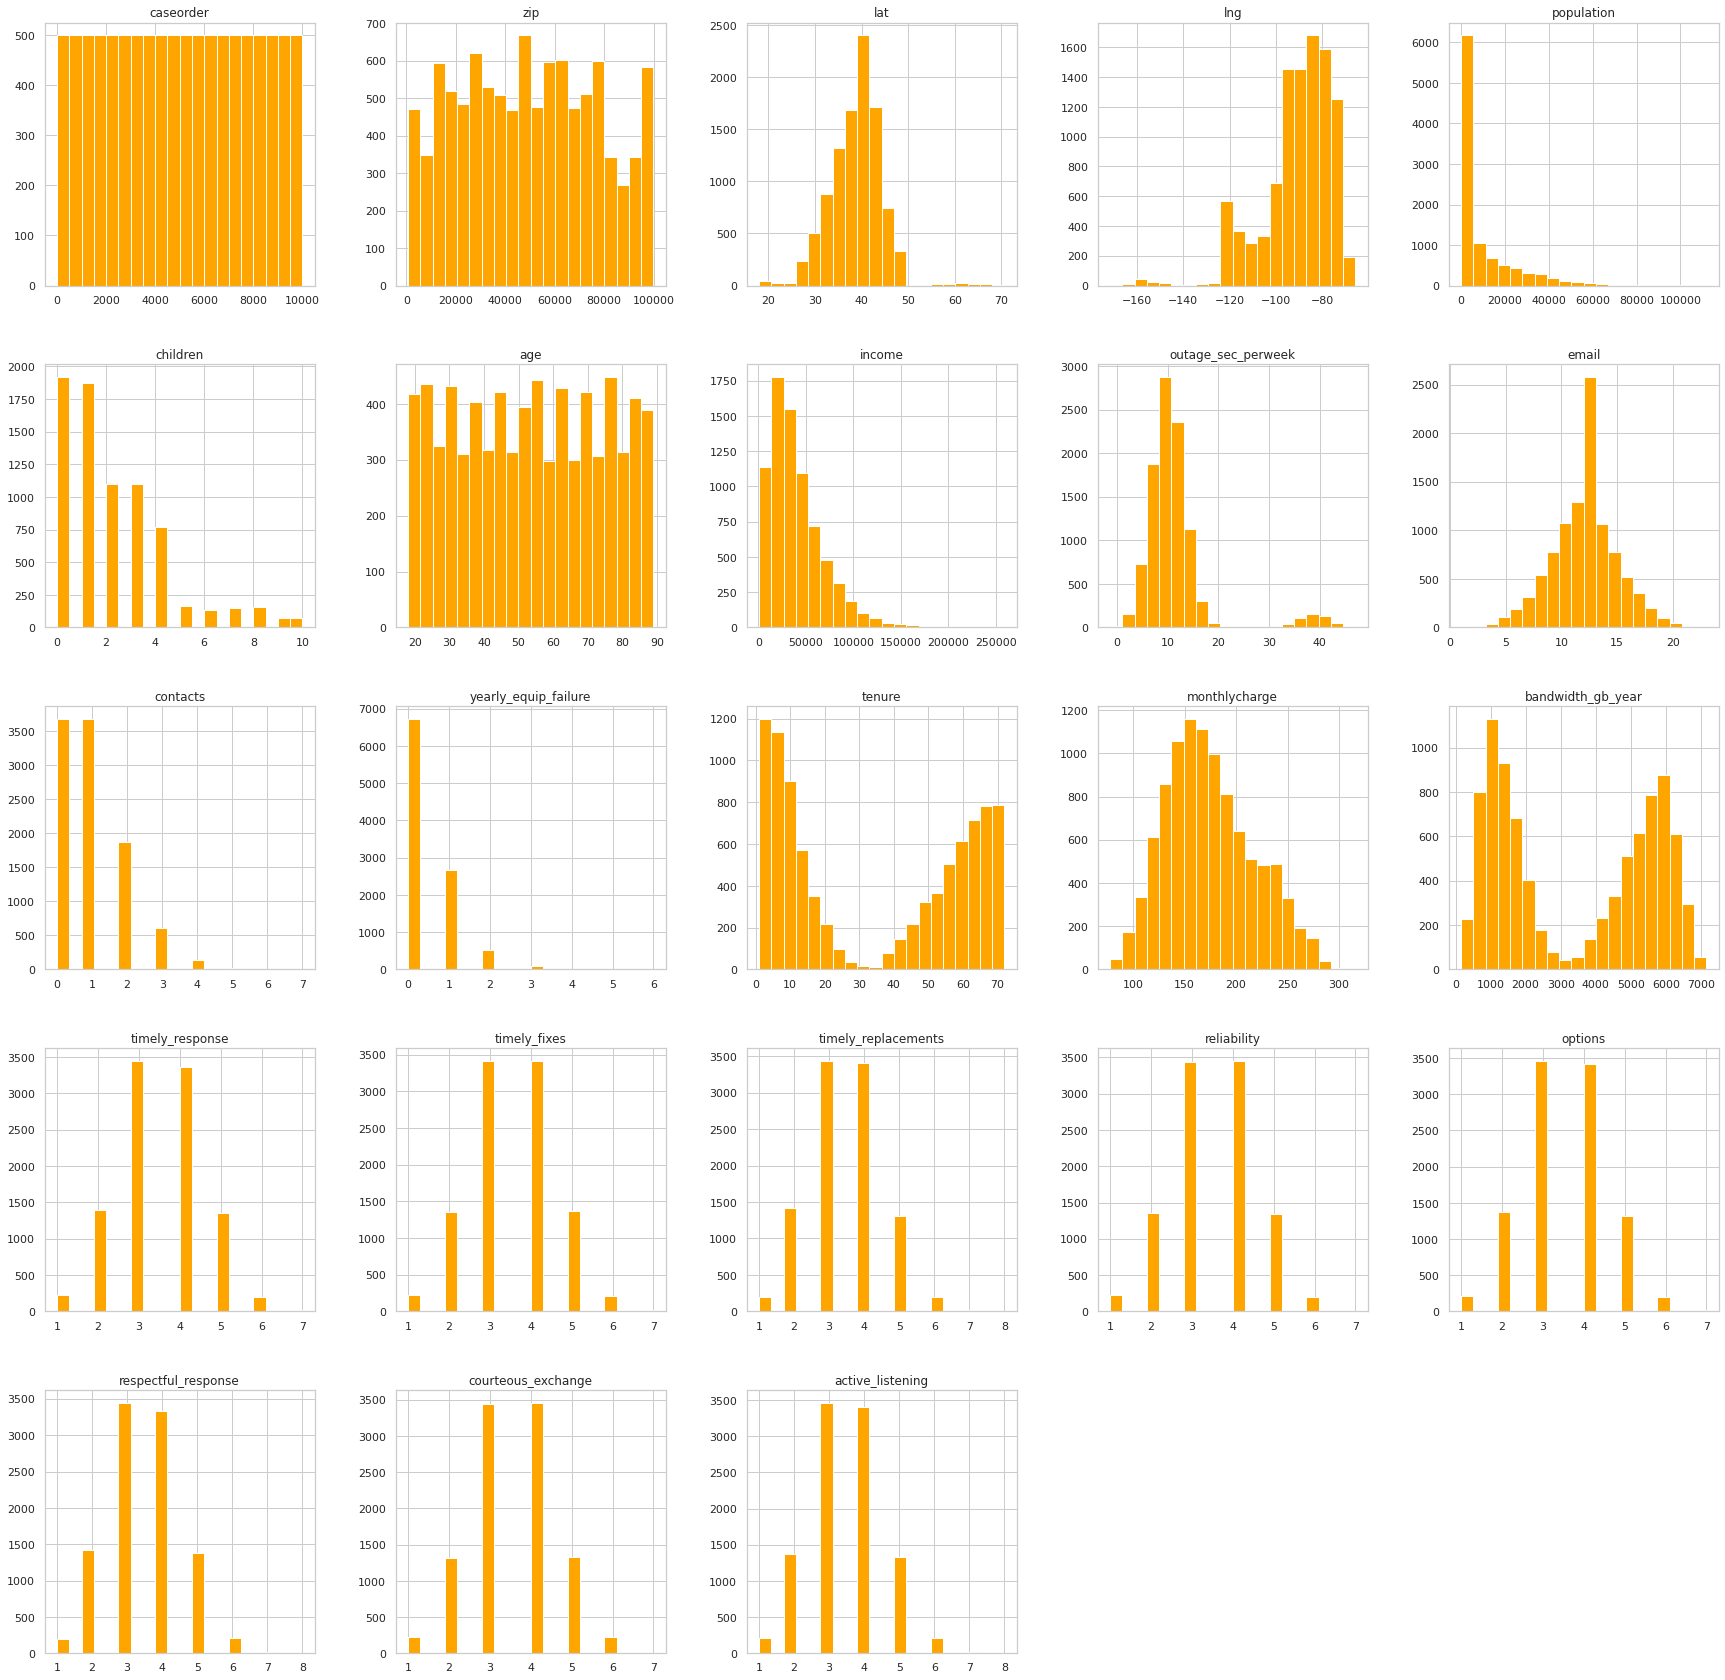

In [74]:
#Acá podemos ver todos los Histogramas de las Variables Numéricas en una misma vista:
df.hist(figsize=(30,30), color='orange', bins=20)
plt.show()

In [35]:
#Análisis particular de la variable "monthlycharge":
variable = 'monthlycharge'

minimo = df[variable].min()
maximo = df[variable].max()
media = df[variable].mean()
mediana = df[variable].median()
moda = df[variable].mode()[0]
stdev = df[variable].std()
varian = df[variable].var()

print('Minimo: ' + str(minimo))
print('Maximo: ' + str(maximo))
print('Media: ' + str(round(media,2)))
print('Mediana: ' + str(mediana))
print('Moda: ' + str(moda))
print('Desviación estándar: ' + str(round(stdev,2)))
print('Varianza: ' + str(round(varian,2)))

Minimo: 77.50523
Maximo: 315.8786
Media: 174.08
Mediana: 169.9154
Moda: 137.4757
Desviación estándar: 43.34
Varianza: 1877.96


<Figure size 720x648 with 0 Axes>

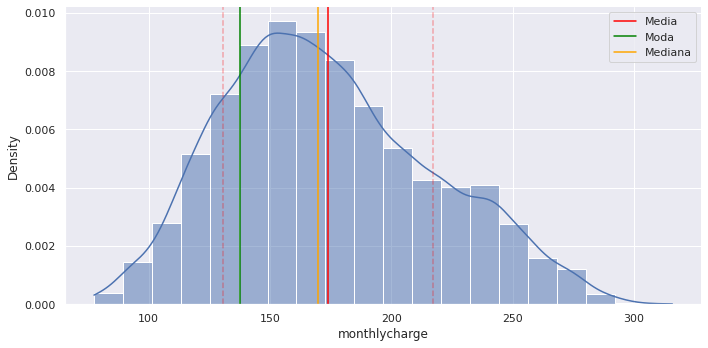

In [36]:
#Histograma y curva de densidad de la variable "monthlycharge" con media, mediana y moda:
plt.figure(figsize=(10, 9))
ax = sns.displot(data=df, 
                 x = variable, 
                 kde=True,
                stat="density",
                height=5,
                aspect=2,
                bins = 20)

plt.axvline(media,
           color = "red",
           label = 'Media')

plt.axvline(media - stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(media + stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(moda,
           color = "green",
           alpha = 1,
           label = 'Moda')

plt.axvline(mediana,
           color = "orange",
           alpha = 1,
           label = 'Mediana')

plt.legend()

plt.show();

Variables Categóricas

In [75]:
#Función para gráficos de variables categóricas:

def plotFrequency(cat_columns):
    '''Graficos de variables categoricas '''
    print()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(data = df, x= cat_columns,order = df[cat_columns].value_counts().index, palette='plasma',ax=ax).set(title=f'Frecuencia de la variable {cat_columns}')

    abs_values = df[cat_columns].value_counts(ascending=False).values
    rel_values = df[cat_columns].value_counts(ascending=False, normalize=True).values * 100

    for pos,abs,rel in zip(ax.patches,abs_values,rel_values):
     label= "{}({}%)".format(abs,round(rel,2))
     plt.text(x=pos.get_x(),y=pos.get_height(),s=label)

    return

In [76]:
#Agregar variables string que se correspondan con las numéricas categóricas para el análisis de variables categóricas
df['children_cat'] = df['children'].apply(lambda x: str(x))
df['age_cat'] = df['age'].apply(lambda x: str(x))
df['caseorder_cat'] = df['caseorder'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['pop_cat'] = df['population'].apply(lambda x: str(x))
df['email_cat'] = df['zip'].apply(lambda x: str(x))
df['contacts_cat'] = df['contacts'].apply(lambda x: str(x))
df['failure_cat'] = df['yearly_equip_failure'].apply(lambda x: str(x))
df['timely_response_cat'] = df['timely_response'].apply(lambda x: str(x))
df['timely_fixes_cat'] = df['timely_fixes'].apply(lambda x: str(x))
df['timely_replacements_cat'] = df['timely_replacements'].apply(lambda x: str(x))
df['reliability_cat'] = df['reliability'].apply(lambda x: str(x))
df['options_cat'] = df['options'].apply(lambda x: str(x))
df['respectful_response_cat'] = df['respectful_response'].apply(lambda x: str(x))
df['courteous_exchange_cat'] = df['courteous_exchange'].apply(lambda x: str(x))
df['active_listening_cat'] = df['active_listening'].apply(lambda x: str(x))

cols_arr = df.columns.values
cols_arr = cols_arr.astype('str')

#validar que se agregaron correctamentes las variables

df[cols_arr[np.char.endswith(cols_arr, '_cat')]].head(2)

,children_cat,age_cat,caseorder_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat,timely_response_cat,timely_fixes_cat,timely_replacements_cat,reliability_cat,options_cat,respectful_response_cat,courteous_exchange_cat,active_listening_cat
0,nan,68.0,1,99927,38,99927,0,1,5,5,5,3,4,4,3,4
1,1.0,27.0,2,48661,10446,48661,0,1,3,4,3,3,4,3,4,4


In [77]:
#Describe para variables categóricas:

df.describe(include=['O','category'])

,customer_id,interaction,city,state,county,area,timezone,job,education,employment,marital,gender,churn,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,children_cat,age_cat,caseorder_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat,timely_response_cat,timely_fixes_cat,timely_replacements_cat,reliability_cat,options_cat,respectful_response_cat,courteous_exchange_cat,active_listening_cat
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,7523,10000,10000,10000,10000,8974,10000,10000,10000,10000,9009,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,6058,52,1620,3,25,639,12,5,5,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4,12,73,10000,8583,5933,8583,8,6,7,7,8,7,7,8,7,8
top,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Houston,TX,Washington,Suburban,America/New_York,Occupational psychologist,Regular High School Diploma,Full Time,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check,nan,nan,1,32340,0,32340,0,0,3,3,3,4,3,3,4,3
freq,1,1,34,603,111,3346,4072,30,2421,5992,2092,5025,7350,6266,5456,5166,7009,4408,8128,5392,6424,5494,5614,5635,5071,5110,5882,3398,2495,2475,1,4,97,4,3680,6727,3448,3415,3435,3452,3462,3445,3456,3461


In [78]:
cat_cols = list(df.select_dtypes(include=['O','category']).columns.values)

In [79]:
all_cat = widgets.Dropdown(options=cat_cols,
                      value = 'churn',
                      description = 'Column Name')

ui = widgets.HBox([all_cat])

out = widgets.interactive_output(plotFrequency, {'cat_columns': all_cat})

display(ui, out)

Output()

####**Obeservaciones variables categóricas:**

Variable objetivo: Churn
Hay 26.5% de valores que son churn, es un problema desbalanceado?

Otras categóricas:
1. Hay variables que tienen demasiados valores: customer_id, interaction, city, county, state y timezone. 
2. state: De las variables con metada dato, trabajaria solo sobre state. Sera mejor en un estado que en otro el servicio y por eso se quedan los clientes? 
Ningun estado sobresale sobre el resto. No tendria sentido agrupar. Quiza podria googlear areas del pais, agregar una columna con ese valor y luego agrupar.
3. Job y education tienen muchas categorías pero se podrían reducir al realizar agrupaciones
4. Las categorias de marital tienen freq similares
5. La mayoria de los contratos son month to month (56%)
6. Tiene sentido analizar esta variable? el 60% de los clientes tiene trabajo fulltime. Tendra correlacion con churn?